### **Biological Signals Analysis 2023**
### **Week 7 Exercise**
### **Poisson Processes Continued**

#### **Table of Contents:**
- **Review**
  - Convolutions
- **Poisson Process: Math Overview**
  - Introduction
  - Homogeneous Poisson Process
  - Heterogeneous Poisson Process
- **Python Exercise: Spike Trains**
  - Creating a Poissonian Spike Train with Python
  - Modelling a Poissonian Spike Train with Python

### **Review:**

##### Convolutions

We previously met the convolution operator:

$
    (f*g)(t) \equiv \int_0^t f(t-\tau)g(\tau)d\tau
$

and its discrete brother with their commutative property:

$
    (f*g)[n] \equiv \sum_{m=-\infty}^{\infty} f[m]g[n-m] =  \sum_{m=-\infty}^\infty f[n-m]g[m]
$

The important points being:
-  Convolution is the standard way to multiply functions, since multiplying them element-wise doesn't make sense most of the time.
- The operation itself requires pretty basic calculus.

### **Poisson Process** 

#### Introduction

The introduction of convolution in our discussion was motivated by the necessity for a rigorous method to compute the average of our spike sequence:

$
\rho (t) = \sum_{i=1}^{n} \delta (t-t_i)
$

Convolving a spike train with a temporal window yields $r(t)$, the time-varying spike rate. Examination of the aforementioned equation reveals its representation of a Linear Time-Invariant (LTI) system, characterized by a summation of delta functions at distinct time points. This observation underpins the mathematical foundations of our subsequent analysis.

Our objective is to delineate and scrutinize spike trains, explicitly excluding sub-threshold activities and treating spikes from a singular neuron as uniform. These presumptions, while rational, necessitate explicit acknowledgment. We acknowledge the inherent variability in spike timings; identical experimental conditions do not guarantee reproducible neuronal responses.

The focus is on developing a model that quantifies the **probability** of observing a specific spike or sequence of spikes in response to a stimulus. While this model does not enable the prediction of every spike, it significantly enhances our comprehension of neural encoding and decoding mechanisms. By defining the probability density function (PDF) of spike timings $p(t_1,\ldots,t_n)$ and integrating it over a time window $\Delta t$, we obtain the aggregate probability for an $n$-spike sequence within specified intervals:

$
P(t_1,\ldots,t_n) = p(t_1,\ldots,t_n) (\Delta t)^n
$

The assumption of having comprehensive knowledge of $p(t_1,\ldots,t_n)$ for all instances is impractical due to the diversity in spike train patterns, which complicates any attempt to precisely approximate this function. A statistical approach to model all potential spike trains may offer a more generalized framework. The firing rate $r(t)$ is defined as the likelihood of a neuron firing within a brief interval around $t$. However, this rate might be influenced by preceding spikes, necessitating information on past events to predict subsequent ones, expressed as:

$
    P(t) = P(t_n|t_1, \ldots, t_{n-1})
$

This presents a substantial challenge, as accurately simulating this probability function is complex. Simplification to consider spike probability at time $t$ as only dependent on the immediate preceding spike leads to:

$
    P(t_n|t_{n-1})
$

Termed a renewal process, this formulation is somewhat more tractable. Nevertheless, if spike probability is deemed independent of prior spikes, we are describing a Poisson Process, aligning with the "independent spike hypothesis".

In conclusion, the probability of observing a spike at a given time $t$ is denoted by $P(t)$ and is contingent solely on $r(t)$. The likelihood of encountering a specific spike train with spikes at times $t_1, t_2, ..., t_n$ is captured by $P(t_1, t_2, ..., t_n)$. The probability distribution function of $P$ is $p$, indicating the probability of observing a particular spike train is $p(t_1, ..., t_n)(\Delta t)^n$. The spike train model, represented by $\rho(t) = \sum_{i=1}^{n}{\delta (t - t_i)}$, will be convolved with a window function to derive $r(t)$. This systematic approach enables a comprehensive analysis of spike trains and their underlying probabilistic structures.

#### Homogeneous Poisson Process

To further simplify our analysis, we will proceed under the assumption that $r(t)$ is constant over time, denoted simply as $r$. This scenario is defined as a **Homogeneous Poisson Process**. The question then arises: what is the probability of observing a specific spike train $P(t_1, \ldots, t_n)$ within the framework of a homogeneous Poisson process?

We begin by considering the factors on which this process might depend. To this end, we introduce a broader function $P_T(n)$, which represents the probability that any sequence of $n$ spikes occurs within a trial duration of $T$. This leads us to question the dependencies of $P_T(n)$. By partitioning the total observation period $T$ into $M$ intervals of length $\Delta t = \frac{T}{M}$, and assuming $\Delta t$ is sufficiently small to preclude the occurrence of more than one spike within any interval, we identify three critical factors influencing $P_T(n)$:

1. **Combinatorial Placement of Spikes**: The number of ways to distribute $n$ spikes across $M$ bins, computed combinatorially as $\binom{M}{n}$.
2. **Probability of Observing $n$ Spikes**: Given the probability of a single spike in a bin is $r\Delta t$, the probability for $n$ such events is $(r \Delta t)^{n}$.
3. **Probability of No Spike in Remaining Bins**: With $M - n$ bins left unoccupied by spikes, the probability of no spikes occurring in these bins is $(1 - r \Delta t)^{M-n}$.

By multiplying these factors, we derive the following expression:

$
P_T(n) = \lim_{\Delta t \rightarrow 0} \binom{M}{n} (r \Delta t)^n (1 - r \Delta t)^{M - n}
$

This limit is approached as $\Delta t \rightarrow 0$, ensuring the precision of our calculation by validating our assumptions. Assuming a large $M$ due to the smallness of $\Delta t$, we approximate $M - n \approx M$ and simplify a component of the binomial coefficient, yielding:

$
\begin{aligned}
\frac{M!}{(M-n)!} \approx M^n  = \left( \frac{T}{\Delta t} \right)^n \ & ; \ \lim_{\Delta t \rightarrow 0} (1 - r \Delta t)^{M-n} = e^{-rT} \\
 \Downarrow & \\
P_T(n) = & \frac{(rT)^n}{n!}e^{-rT}
\end{aligned}
$

This equation epitomizes the Poisson distribution, with Figure 2 illustrating typical values for $P_T(n)$. Upon establishing this function, we revisit the initially measured spike train $P(t_1,\ldots,t_n)$. Although not demonstrated here, the comprehensive relationship between these two distributions is encapsulated by:

$
P(t_1,\ldots,t_n) = n! P_T(n) \left( \frac{\Delta t}{T} \right)^n
$

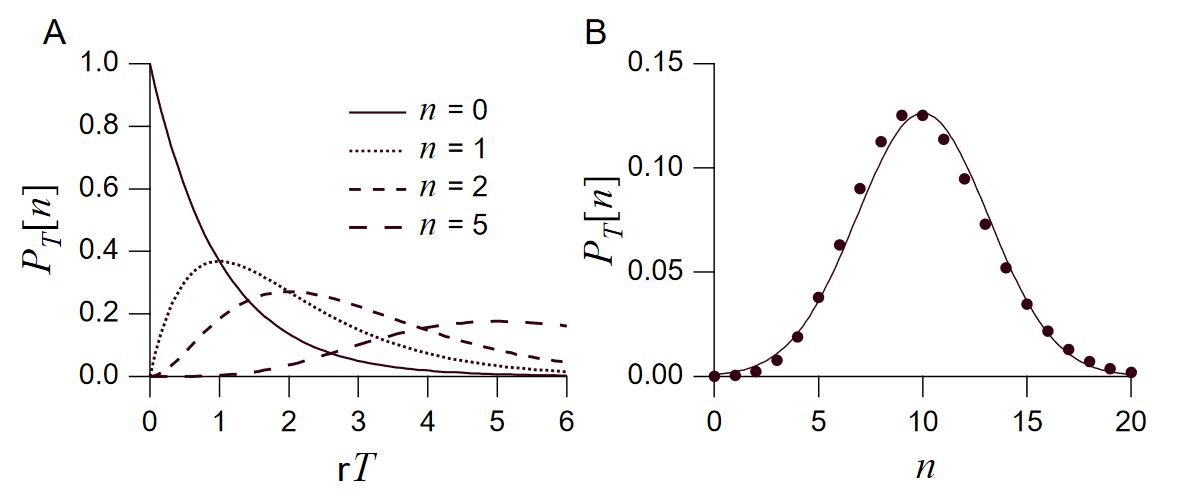

#### Inhomogeneous Poisson Process



\subsection{Inhomogeneous Poisson Process}

The inhomogeneous case, in which $r = r(t)$, implies that every sequence of
spikes has its own probability, even when it has exactly $n$ spikes. In
Abbott and in Anan's presentation you can see how to derive that the probability density for an $n$-spike train is

\begin{equation}
p(t_1,\ldots,t_n)=\exp\left( -\int_{0}^{T}r(t)dt \right)
\prod_{i=1}^{n}r(t_i)
\end{equation}
where $t_1,\ldots,t_n$ are ordered. This equation still assumes that each spike is independent of the previous one.

\section{Properties of signals and spike trains}

In this part we'll explore some statistical properties of the $P_T(n)$ PDF, namely its variance and mean. We've already seen in exercise 1 that the variance of Poisson process is equal to the coefficient of the distribution:

\begin{equation}
\sigma_n^2 = \left<n^2\right> - \left<n\right>^2 = rT
\end{equation}
where the $\left<\right>$ sign implies calculating the expected value. The mean
of such a process is again $\left<n\right>=rT$, making the variance and mean
equal.

\subsection{Fano factor and coefficient of variation}

The ratio of these two quantities (variance and mean) is called \textit{Fano
factor}, and can be used to describe a real, measured spike train when we wish to compare it to a true (idealized) homogeneous Poisson process, in which it's equal to one. Figure \ref{fig:fanofac} shows the distribution that can help us calculate the Fano factor.

\begin{equation}
\text{Fano factor} \equiv F = \frac{\sigma_n^2}{\left< n \right>}
\end{equation}

If the underlying neural process that generated the spikes was Poissonic-like, we expect our FF to be equal to one.

\begin{figure}
\begin{centering}
\includegraphics[scale=1]{ImagesExtraMaterial/fano_factor.png}
\par\end{centering} \caption{Aggregation of spike trains from multiple neurons are usually position around a value of 1 for the Fano factor. From Izhar Bar-Gad lectures.}
\label{fig:fanofac}
\end{figure}

A second important variable that describes the distribution in equation \ref{eq:ProbT} is called the \textit{coefficient of variation}. To calculate it we first need the mean of the distribution. The mean interspike interval is

\begin{equation}
\begin{aligned}
\left<\tau\right> & = \int_0^\infty \tau p(\tau) d\tau \\
& = \int_0^\infty \tau r e^{-r\tau} d\tau \\
& = r \int_0^\infty \tau e^{-r\tau} d \tau \text{\ \ \ (Gamma function)}\\
& = r \left[ \frac{1}{r^2} \right] = \frac{1}{r}
\end{aligned}
\end{equation}
and the variance of the interspike intervals is

\begin{equation}
\sigma_\tau^2 = \int_0^\infty \tau^2 r e^{-r\tau} d\tau - \left< \tau \right>^2
= \frac{1}{r^2}
\end{equation}

The ratio of the standard deviation and the expected value is the \emph{coefficient of variation,} and is again equal to one for a true homogeneous Poisson distribution. It's useful since we always have to think of the standard deviation of the data in the context of its mean (= making it a dimensionless
quantity). When this coefficient is bigger than one, The neurons are usually
bursty. When it's lower, we're usually dealing with a regular neurons,
deterministic in character (i.e. integrates and fires).

\begin{equation}
C_V = \frac{\sigma_\tau}{\left< \tau \right>}
\end{equation}

For processes in which the next spike depends on the previous one, the Fano
factor approaches $C_V^2$ over long time intervals. An example for the
coefficient of variation is given in figure \ref{fig:Cv}.

\begin{figure}
\begin{centering}
\includegraphics[scale=1]{ImagesExtraMaterial/coefficient_of_var.png}
\par\end{centering} \caption{Different probability density functions lead to
different coefficients of variation. From Izhar Bar-Gad lectures.}
\label{fig:Cv}
\end{figure}

\end{document}

### **Python Exercise: Spike Trains**

#### Creating a Poissonian Spike Train with Python

#### Modelling a Poissonian Spike Train with Python